3.1 Tranformations and adjustments

In [2]:
library(fpp3)

── Attaching packages ────────────────────────────────────────────── fpp3 0.5 ──

✔ tibble      3.2.1     ✔ tsibble     1.1.3
✔ dplyr       1.1.3     ✔ tsibbledata 0.4.1
✔ tidyr       1.3.0     ✔ feasts      0.3.1
✔ lubridate   1.9.3     ✔ fable       0.3.3
✔ ggplot2     3.4.3     ✔ fabletools  0.3.4

── Conflicts ───────────────────────────────────────────────── fpp3_conflicts ──
✖ lubridate::date()    masks base::date()
✖ dplyr::filter()      masks stats::filter()
✖ tsibble::intersect() masks base::intersect()
✖ tsibble::interval()  masks lubridate::interval()
✖ dplyr::lag()         masks stats::lag()
✖ tsibble::setdiff()   masks base::setdiff()
✖ tsibble::union()     masks base::union()



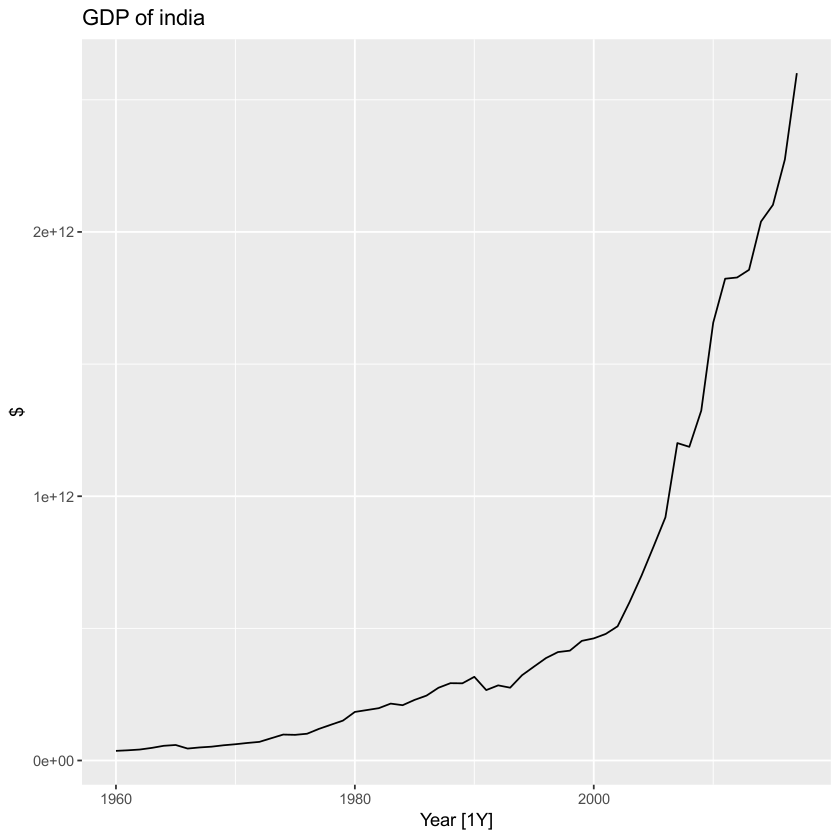

In [3]:
global_economy |> filter(Country=="India") |> autoplot(GDP) + labs(title="GDP of india",y="$")

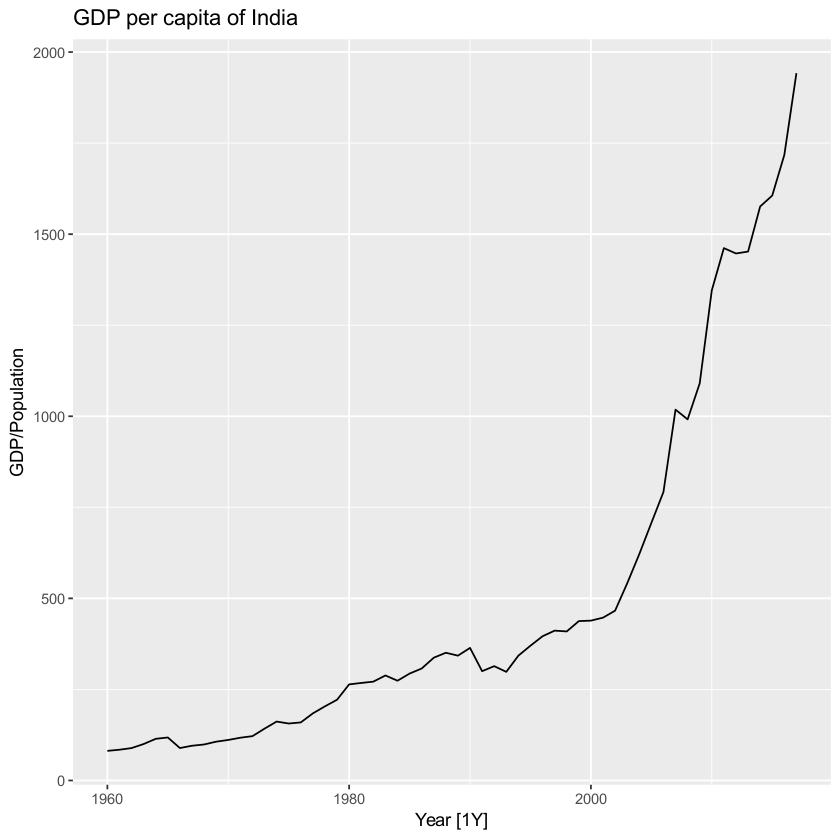

In [4]:
#plot the gdp per capita of india


global_economy |>
filter(Country == "India")|>
autoplot(GDP/Population) + labs(title="GDP per capita of India")

In [5]:
india <- global_economy|> filter(Country=="India")

In [6]:
head(india)

Country,Code,Year,GDP,Growth,CPI,Imports,Exports,Population
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
India,IND,1960,36535925031,NA,2.527487,6.909800,4.510045,449480608
India,IND,1961,38709096076,3.722743,2.570333,6.023940,4.348798,458494963
India,IND,1962,41599070242,2.931128,2.663693,6.099006,4.212773,467852537
India,IND,1963,47776000900,5.994353,2.742170,5.972633,4.325473,477527970
India,IND,1964,55726873084,7.452950,3.108394,5.748325,3.764690,487484535
India,IND,1965,58760424670,-2.635770,3.402906,5.269615,3.342220,497702365


In [7]:
# The inflation factor should also be considered to get the real picture of the GDP
# Hence we create a new column called adjusted_gdp


india_updated <-india|>mutate(Adjusted_GDP = GDP/CPI*100)

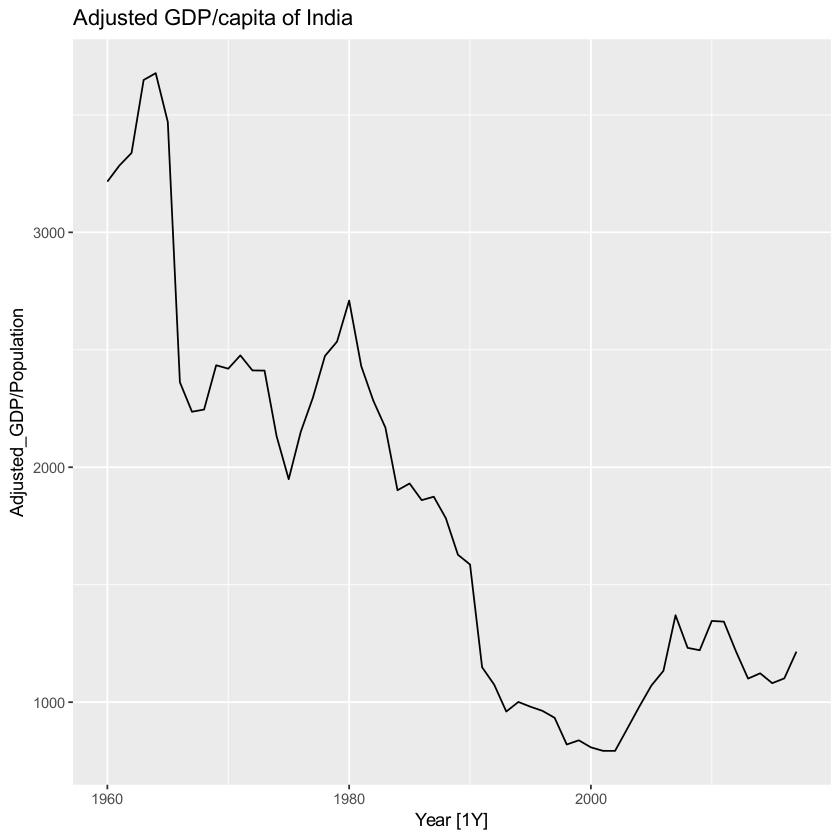

In [8]:
# Now lets plot the data and check whether the CPI had any effect on the GDP or not



india_updated |> autoplot(Adjusted_GDP/Population) +labs(title="Adjusted GDP/capita of India")

In [9]:
tail(aus_retail)

State,Industry,Series ID,Month,Turnover
<chr>,<chr>,<chr>,<mth>,<dbl>
Western Australia,Takeaway food services,A3349435A,2018 Jul,179.3
Western Australia,Takeaway food services,A3349435A,2018 Aug,178.5
Western Australia,Takeaway food services,A3349435A,2018 Sep,179.8
Western Australia,Takeaway food services,A3349435A,2018 Oct,183.2
Western Australia,Takeaway food services,A3349435A,2018 Nov,183.7
Western Australia,Takeaway food services,A3349435A,2018 Dec,195.1


In [10]:
food_service <- aus_retail |> filter(Industry=="Takeaway food services") |>
group_by(Industry) |>
index_by(Year=year(Month)) |>
summarise(Turnover = sum(Turnover))

aus_economy <- global_economy |> filter(Code=="AUS")

In [11]:
head(food_service)

Industry,Year,Turnover
<chr>,<dbl>,<dbl>
Takeaway food services,1982,1808.9
Takeaway food services,1983,2525.9
Takeaway food services,1984,2747.2
Takeaway food services,1985,2969.7
Takeaway food services,1986,3390.7
Takeaway food services,1987,3832.6


In [12]:
head(aus_economy)

Country,Code,Year,GDP,Growth,CPI,Imports,Exports,Population
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Australia,AUS,1960,18573188487,NA,7.960458,14.06175,12.99445,10276477
Australia,AUS,1961,19648336880,2.485605,8.142560,15.02508,12.40310,10483000
Australia,AUS,1962,19888005376,1.296478,8.116545,12.63093,13.94301,10742000
Australia,AUS,1963,21501847911,6.214278,8.168574,13.83405,13.00589,10950000
Australia,AUS,1964,23758539590,6.978724,8.402706,13.76450,14.93825,11167000
Australia,AUS,1965,25931235301,5.983450,8.688866,15.26734,13.22018,11388000


Warning message:
“Removed 1 row containing missing values (`geom_line()`).”


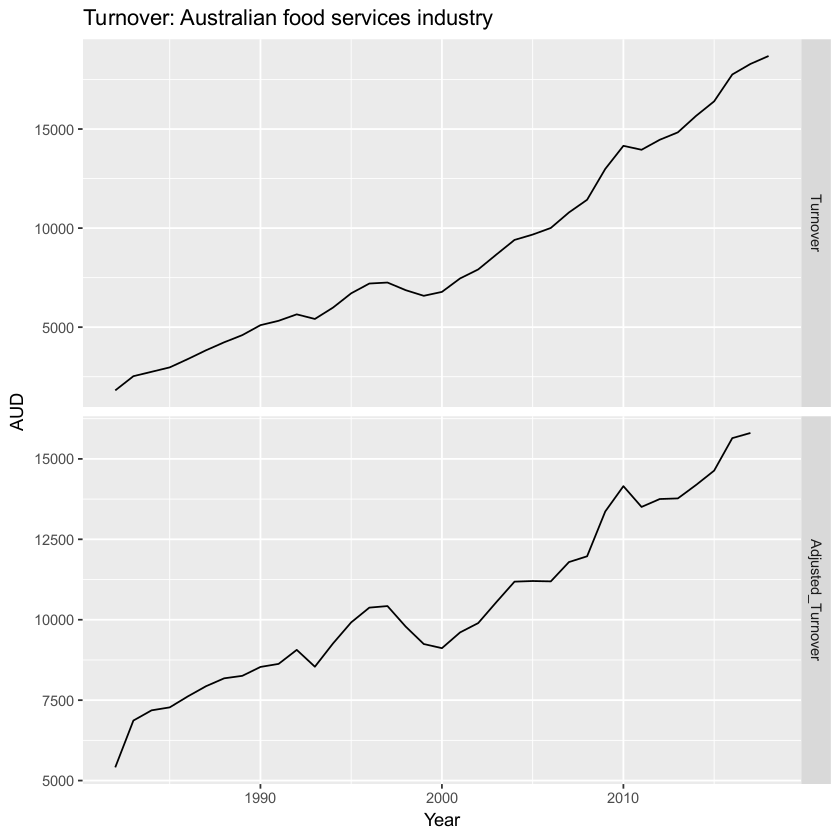

In [13]:
#join the two columns


food_service |> left_join(aus_economy, by="Year")|>
mutate(Adjusted_Turnover = Turnover/CPI*100)|>
pivot_longer(c(Turnover, Adjusted_Turnover), values_to="Turnover") |>
mutate(name=factor(name, levels=c("Turnover", "Adjusted_Turnover")))|>
ggplot(aes(x=Year, y=Turnover))+
geom_line()+
facet_grid(name~.,scales="free_y")+
labs(title="Turnover: Australian food services industry", y="AUD")

In [14]:
# As far as transformations are considered we can use logarithm or box-cox transormations
# We can adjust the value of lambda as per our needs, usually a lower value of lambda leads to a more transformed graph
lambda <- aus_production |> features(Gas, features=guerrero) |> pull(lambda_guerrero)


In [15]:
install.packages("latex2exp", dependencies=T)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



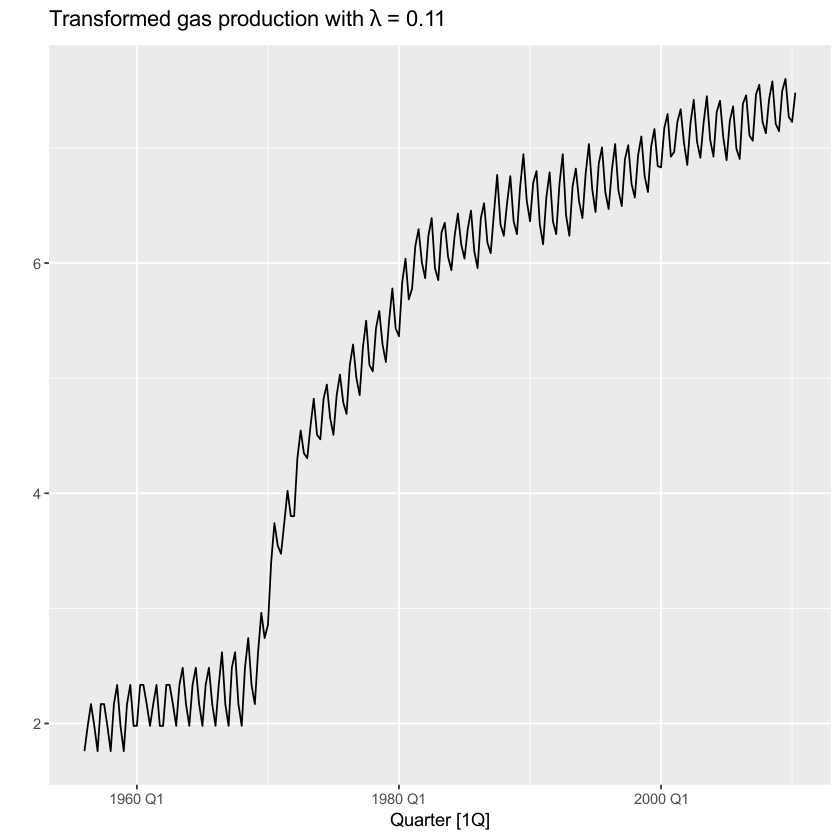

In [16]:
aus_production |> autoplot(box_cox(Gas, lambda)) + labs(y = "", title=latex2exp::TeX(paste0("Transformed gas production with $\\lambda$ = ", round(lambda,2))))

3.2 -- Time Series Components

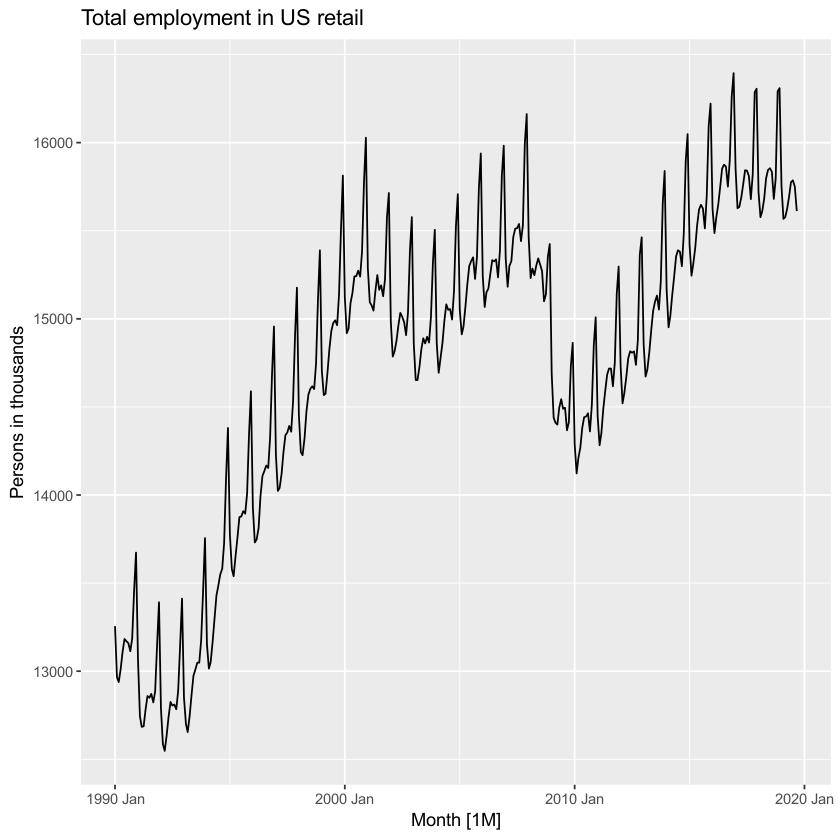

In [17]:
# We look at the employment in the US retail sector data


# We will look at several methods for obtaining the components, st, tt and rt later inthis chapter  but first it is helpful tio see an example. We will decompose the number of persons employed in retail





us_emp <- us_employment |> filter(year(Month) >= 1990, Title=="Retail Trade")|> select(-Series_ID)


autoplot(us_emp, Employed) + labs(y="Persons in thousands", title="Total employment in US retail")

In [18]:
head(us_emp)

Month,Title,Employed
<mth>,<chr>,<dbl>
1990 Jan,Retail Trade,13255.8
1990 Feb,Retail Trade,12966.3
1990 Mar,Retail Trade,12938.2
1990 Apr,Retail Trade,13012.3
1990 May,Retail Trade,13108.3
1990 Jun,Retail Trade,13182.8


In [19]:
# we use stl deomposition method which is discussed in section 3.6


dcmp <- us_emp |> model(stl=STL(Employed))
components(dcmp)

.model,Month,Employed,trend,season_year,remainder,season_adjust
<chr>,<mth>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
stl,1990 Jan,13255.8,13288.01,-33.047062,0.8358973,13288.85
stl,1990 Feb,12966.3,13269.10,-258.190424,-44.6052068,13224.49
stl,1990 Mar,12938.2,13250.18,-289.872766,-22.1073302,13228.07
stl,1990 Apr,13012.3,13231.26,-220.017519,1.0529563,13232.32
stl,1990 May,13108.3,13211.41,-114.395590,11.2815978,13222.70
stl,1990 Jun,13182.8,13191.56,-24.266100,15.5026778,13207.07
stl,1990 Jul,13170.1,13171.71,-23.239664,21.6268123,13193.34
stl,1990 Aug,13159.5,13151.27,-9.523898,17.7545764,13169.02
stl,1990 Sep,13113.4,13130.83,-39.450851,22.0250586,13152.85


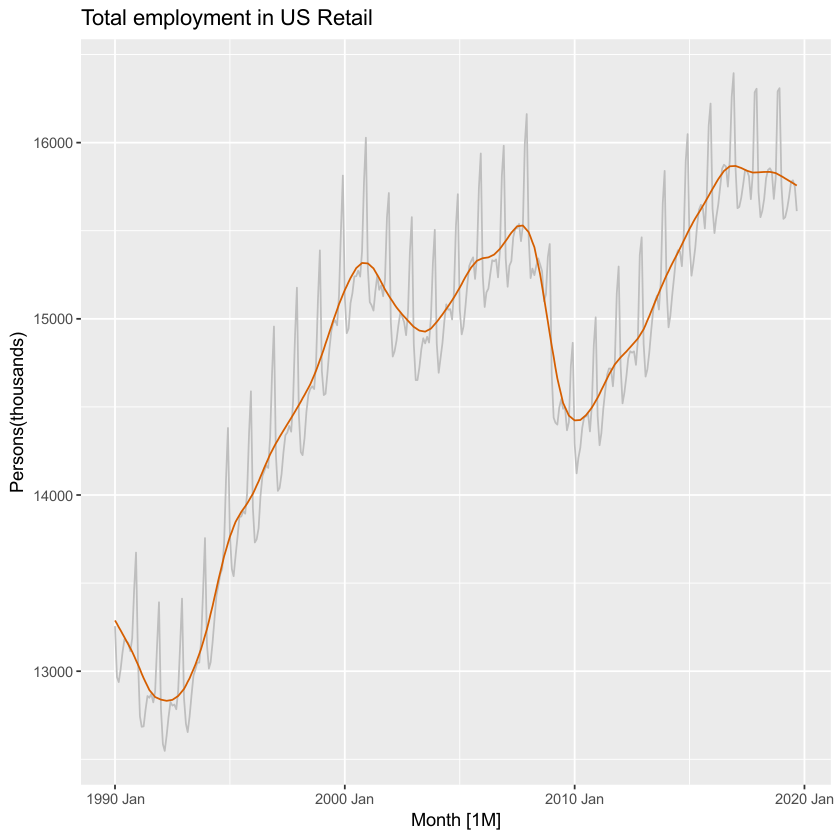

In [20]:
##Now plotting the trend cycle component


components(dcmp) |> as_tsibble() |> autoplot(Employed, colour="gray") +
geom_line(aes(y=trend), colour="#D55E00") + labs(y = "Persons(thousands)", title="Total employment in US Retail")

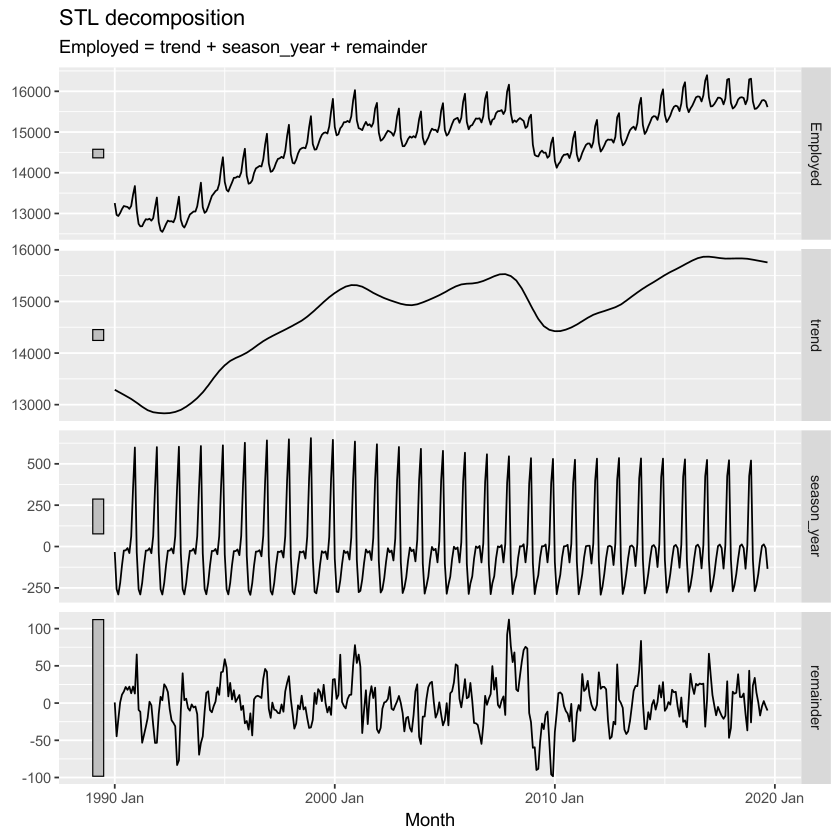

In [21]:
# We can also plot all the components individually but in a singel graph


components(dcmp) |> autoplot()

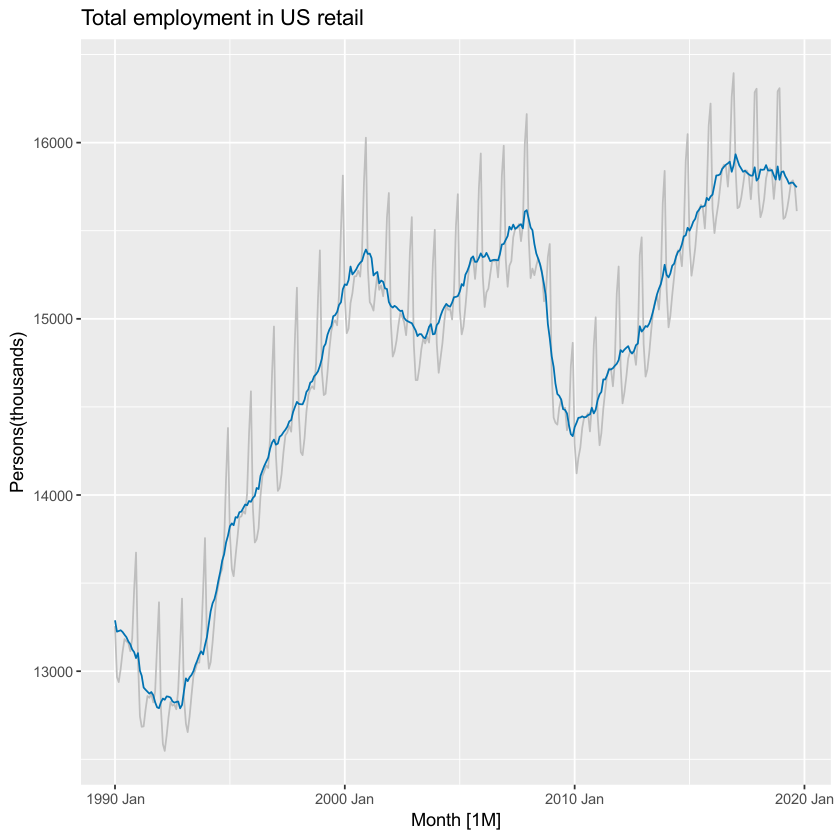

In [22]:
# Seasonally adjusted data but with, remainder component


components(dcmp) |>
as_tsibble()|>
autoplot(Employed, colour="gray") +
geom_line(aes(y=season_adjust), colour="#0072B2") +
labs(y="Persons(thousands)",
title="Total employment in US retail")

3.3 -- MOving Average 

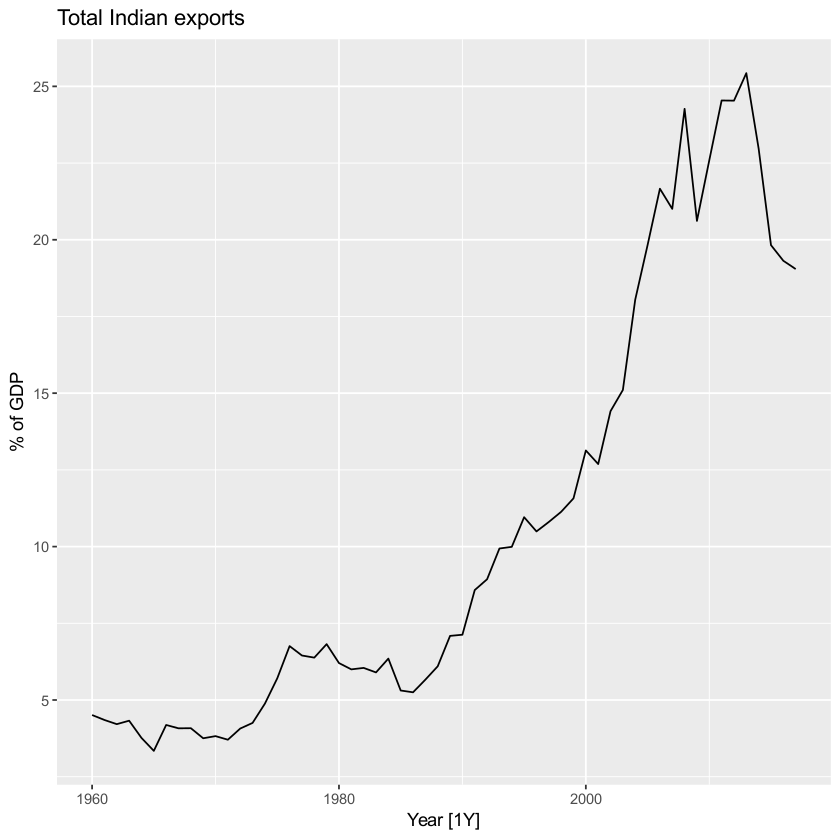

In [23]:
#m-MA means m order moving average
# where m = 2k+1

# For example, consider Figure 3.9 which shows exports of India as a percentage of GDP from 1960 to 2017


global_economy |> filter(Country=="India") |> autoplot(Exports)+
labs(y="% of GDP", title="Total Indian exports")

In [24]:
ind_exports <- global_economy |>filter(Code=="IND")|> mutate(`5-MA` = slider::slide_dbl(Exports, mean, .before =2, .after=2, .complete = TRUE))

In [25]:
head(ind_exports)

Country,Code,Year,GDP,Growth,CPI,Imports,Exports,Population,5-MA
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
India,IND,1960,36535925031,NA,2.527487,6.909800,4.510045,449480608,NA
India,IND,1961,38709096076,3.722743,2.570333,6.023940,4.348798,458494963,NA
India,IND,1962,41599070242,2.931128,2.663693,6.099006,4.212773,467852537,4.232356
India,IND,1963,47776000900,5.994353,2.742170,5.972633,4.325473,477527970,3.998791
India,IND,1964,55726873084,7.452950,3.108394,5.748325,3.764690,487484535,3.966245
India,IND,1965,58760424670,-2.635770,3.402906,5.269615,3.342220,497702365,3.939057


Warning message:
“Removed 4 rows containing missing values (`geom_line()`).”


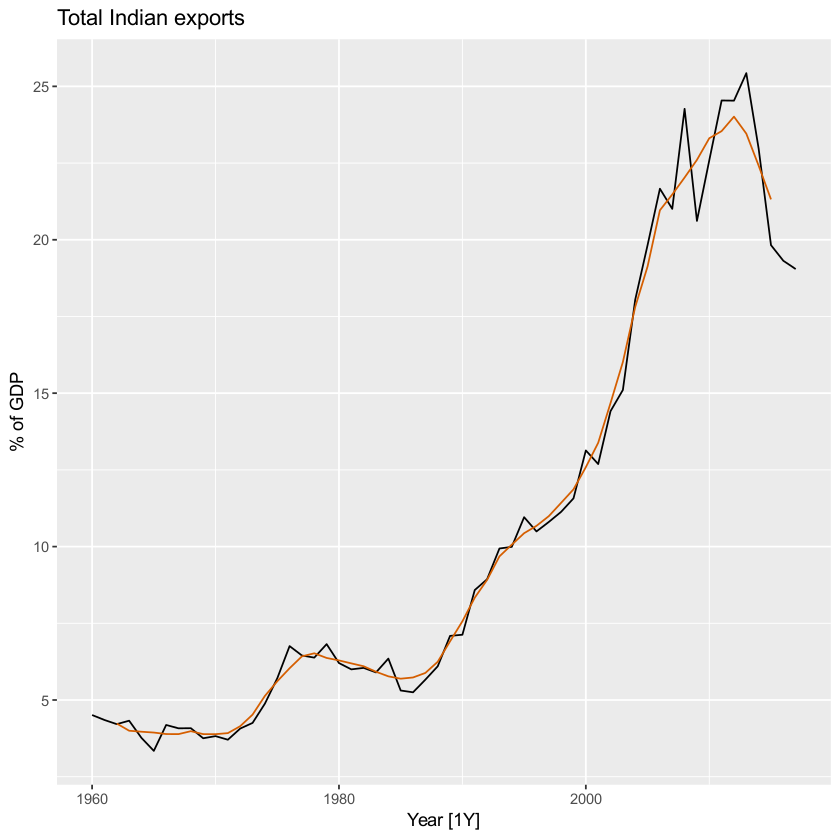

In [26]:
# To see what the trend cyclel estimate looks like, we plot it along with the original data in the following figure


ind_exports |> autoplot(Exports) + geom_line(aes(y=`5-MA`), colour="#D55E00") + labs(y="% of GDP", title="Total Indian exports") + guides(colour=guide_legend(title="series"))

Moving average of moving averages

In [27]:
# It is possible to apply a moving average to a moving average. On4e reason for dooing this is to make an even 0order moving average symmetric



# For example we might tak3e a moveing average of order 4, and then apply another moving average of order 2 to the results. In the following table, this has been done for the first few years for the Australian quarterly beer production data.

beer <- aus_production |> filter(year(Quarter)>= 1992) |> select(Quarter, Beer)
head(beer)

Quarter,Beer
<qtr>,<dbl>
1992 Q1,443
1992 Q2,410
1992 Q3,420
1992 Q4,532
1993 Q1,433
1993 Q2,421


In [28]:
beer_ma <- beer |> mutate(`4-MA` = slider::slide_dbl(Beer, mean, .before=1, .after=2, .complete = TRUE), `2x4-MA` = slider::slide_dbl(Beer, mean, .before=2, .after=1, .complete=TRUE))

In [29]:
head(beer_ma)

Quarter,Beer,4-MA,2x4-MA
<qtr>,<dbl>,<dbl>,<dbl>
1992 Q1,443,NA,NA
1992 Q2,410,451.25,NA
1992 Q3,420,448.75,451.25
1992 Q4,532,451.50,448.75
1993 Q1,433,449.00,451.50
1993 Q2,421,444.00,449.00


Example: Employment in the US retail sector

In [31]:
us_retail_employment_ma <- us_emp |>
mutate(
    `12-MA` = slider::slide_dbl(Employed, mean, .before=5, .after=6, .complete=TRUE),
    `2x12-MA` = slider::slide_dbl(`12-MA`,mean, .before=1, .after=0, .complete=TRUE)
)

Warning message:
“Removed 12 rows containing missing values (`geom_line()`).”


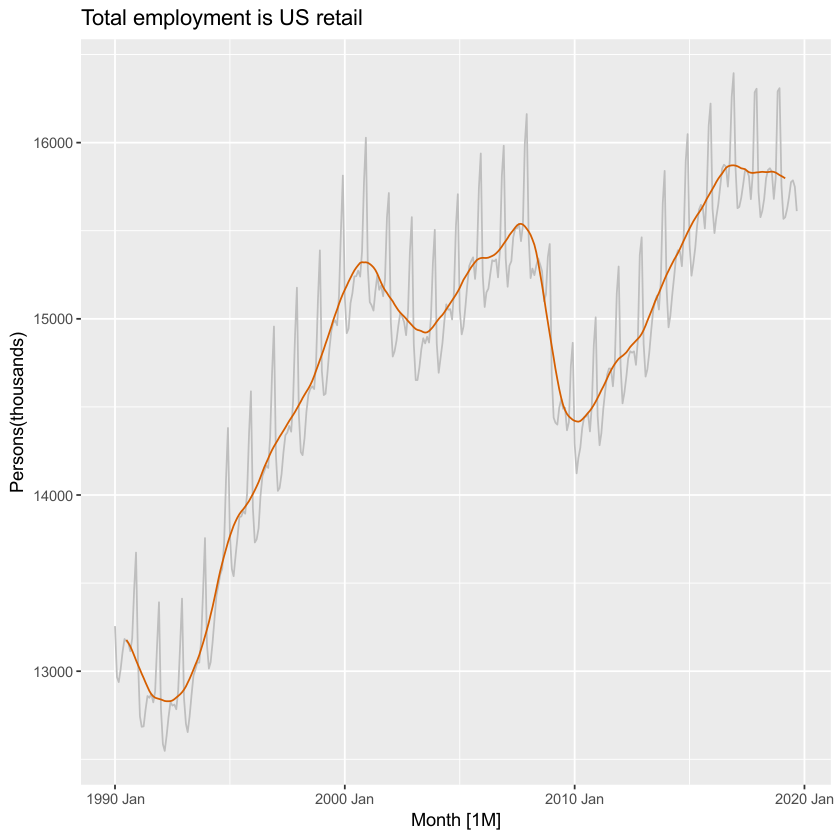

In [32]:
us_retail_employment_ma |>
autoplot(Employed, colour="gray") +
geom_line(aes(y=`2x12-MA`), colour="#D55E00") + labs(y="Persons(thousands)", title="Total employment is US retail")

3.4 Classical decomposition

In [33]:
tail(us_employment)

Month,Series_ID,Title,Employed
<mth>,<chr>,<chr>,<dbl>
2019 Apr,TEMPHELPN,"All Employees, Temporary Help Services",2969.2
2019 May,TEMPHELPN,"All Employees, Temporary Help Services",3009.5
2019 Jun,TEMPHELPN,"All Employees, Temporary Help Services",3025.7
2019 Jul,TEMPHELPN,"All Employees, Temporary Help Services",2965.9
2019 Aug,TEMPHELPN,"All Employees, Temporary Help Services",3040.0
2019 Sep,TEMPHELPN,"All Employees, Temporary Help Services",3109.2


In [34]:
head(us_employment)

Month,Series_ID,Title,Employed
<mth>,<chr>,<chr>,<dbl>
1939 Jan,CEU0500000001,Total Private,25338
1939 Feb,CEU0500000001,Total Private,25447
1939 Mar,CEU0500000001,Total Private,25833
1939 Apr,CEU0500000001,Total Private,25801
1939 May,CEU0500000001,Total Private,26113
1939 Jun,CEU0500000001,Total Private,26485


Warning message:
“Removed 6 rows containing missing values (`geom_line()`).”


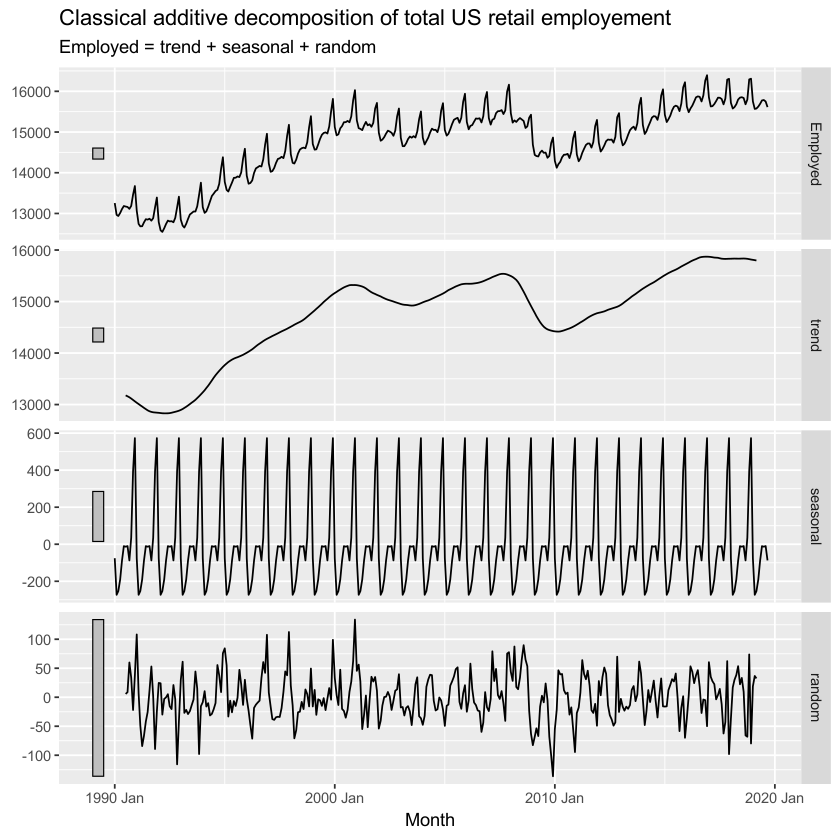

In [35]:
us_emp |>
model(
    classical_decomposition(Employed, type="additive")
)|>
components()|>
autoplot() +
labs(title="Classical additive decomposition of total US retail employement")

Multiplicative decomposition

Warning message:
“Removed 6 rows containing missing values (`geom_line()`).”


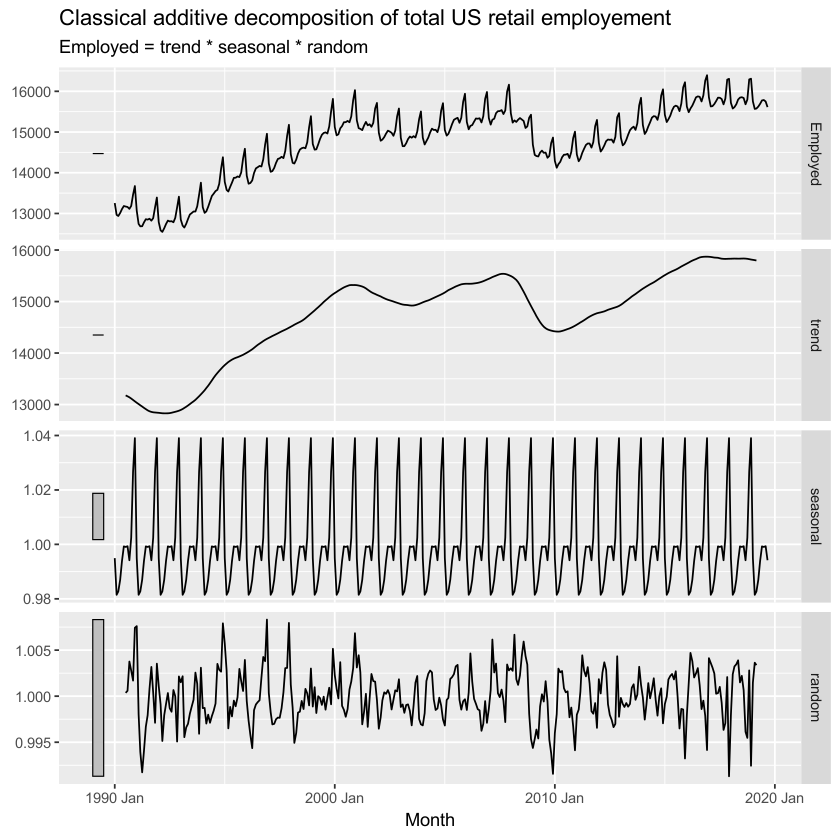

In [36]:
us_emp |>
model(
    classical_decomposition(Employed, type="multiplicative")
)|>
components()|>
autoplot() +
labs(title="Classical additive decomposition of total US retail employement")

3.5 Methods used by official stats agencies

In [37]:
# Most of them use the variants of the x-11 method or the SEATS method, or a combination of the two.

# These two methods are specifically designed to work with quarterly and montyhly data.


#They will not handle seasonality of other kinds such as daily data, or hourly data or weekly data.

install.packages("seasonal", dependencies=TRUE)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



X-11

In [38]:
## X11 is based on classical decomposition, but includes many extra steps and features in order to overcome the drawbacks of classical decomposition that were discussed in the previous section



# In particular, trend-cycle estimates are available for all observations including the end points, and the seasonal component is allowed to vary slowly over time



# X-11 also handles trading day variation, holiday effects and the effects of known predictiors.



# Also  this is a multiplicative decomposition


# Also in case of multiplicative decomposition the seasonality is centered around 1

x11_dcmp <- us_emp |> model(x11 = X_13ARIMA_SEATS(Employed ~ x11())) |>
components()

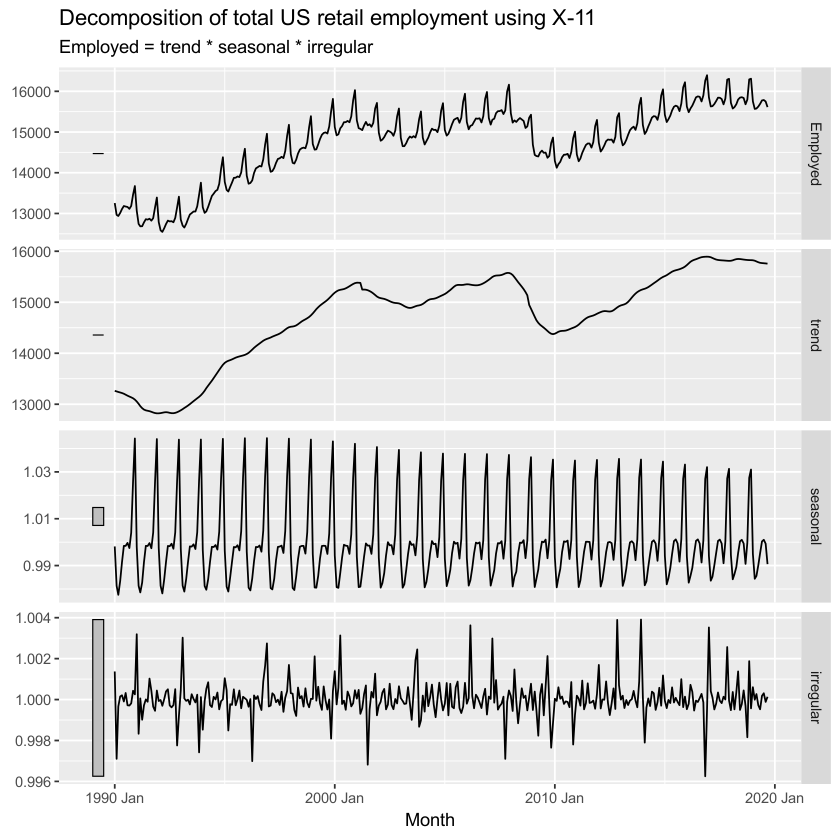

In [39]:
autoplot(x11_dcmp) + labs(title = "Decomposition of total US retail employment using X-11")

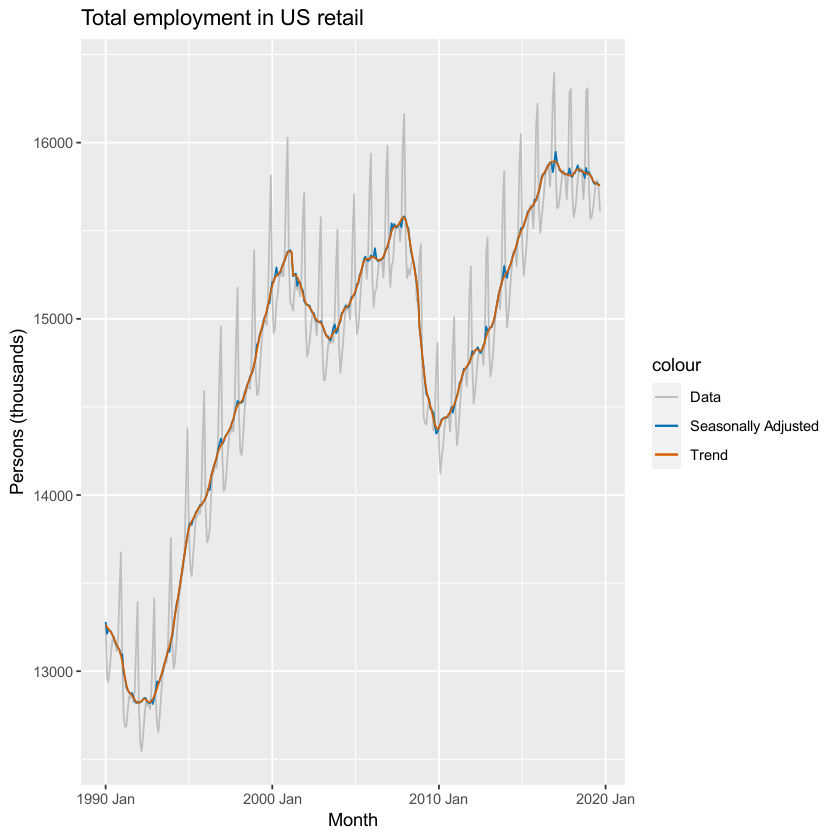

In [41]:
x11_dcmp |> ggplot(aes(x=Month)) + geom_line(aes(y=Employed, colour="Data")) + geom_line(aes(y = season_adjust, colour = "Seasonally Adjusted")) +
geom_line(aes(y=trend, colour="Trend")) + 
labs(y = "Persons (thousands)", title= "Total employment in US retail")+

scale_colour_manual(
    values = c("gray", "#0072B2", "#D55E00"),
    breaks = c("Data", "Seasonally Adjusted", "Trend")
)

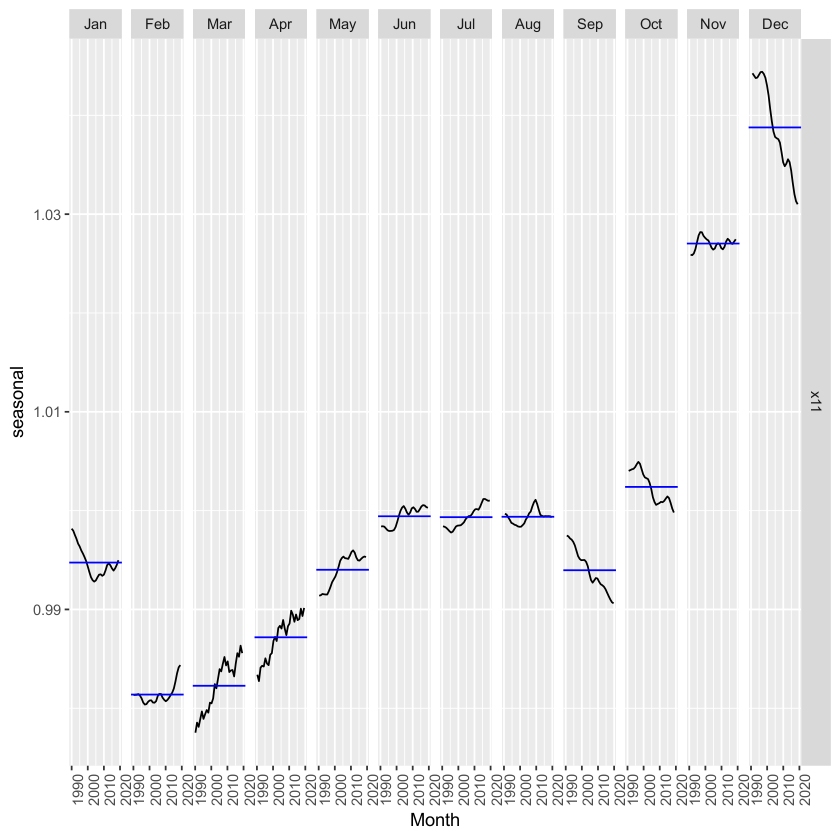

In [42]:
# It can be useful to use seasonal plots and seasonal sub-series plots of the seasonal compo9net, to help us visualizes the variation in the seasonal compontn over time


x11_dcmp |> gg_subseries(seasonal)

## SEATS method

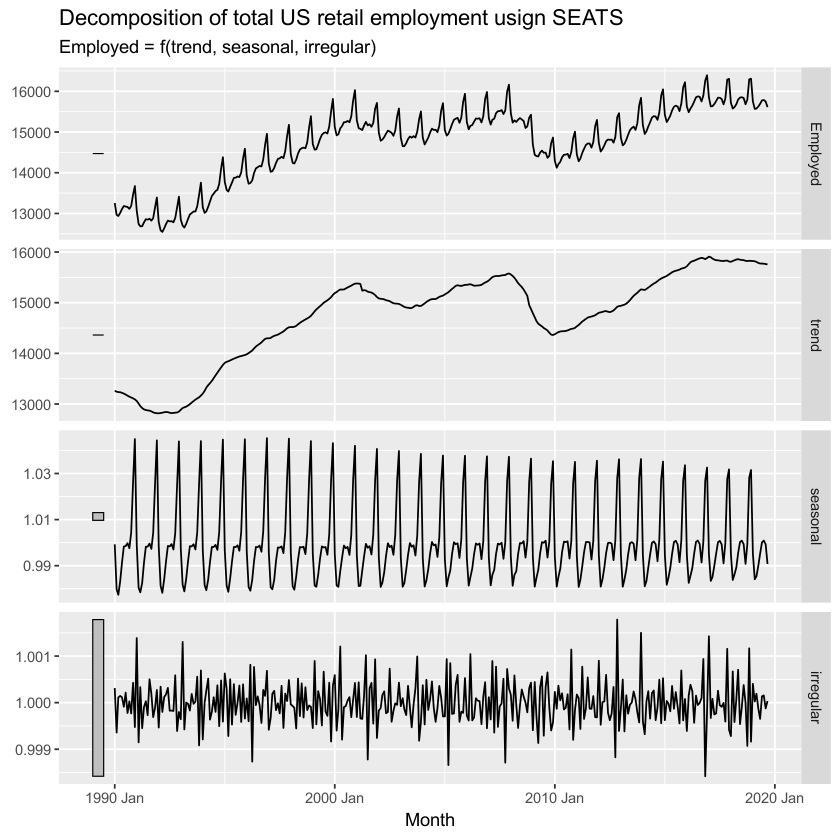

In [44]:
# SEATS stands for Seasonal Extraction in ARIMA Time SEries



seats_dcmp <- us_emp |> model(seats = X_13ARIMA_SEATS(Employed~seats())) |> components()

autoplot(seats_dcmp) + labs(title = "Decomposition of total US retail employment usign SEATS")

In [ ]:
# The abov e figure shows the SEATS method applied to the total reatial employment series across the US. The result is quite similar to that obtained using the x11 method




3.6 STL decomposition